# Hierarchical Indexing

In [1]:
import pandas as pd
import numpy as np
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], 
                        [1,2,3,1,3,1,2,2,3]])
data

a  1    0.066072
   2    0.229214
   3    0.430933
b  1    0.092056
   3   -1.164205
c  1   -1.124371
   2    0.231518
d  2   -0.681320
   3    1.154228
dtype: float64

In [ ]:
data['b']

1    1.257585
3   -1.041106
dtype: float64

In [ ]:
data['b':'c']

b  1    1.257585
   3   -1.041106
c  1    1.002684
   2    0.752568
dtype: float64

In [ ]:
data.loc[['b', 'd']]

b  1    1.257585
   3   -1.041106
d  2    1.292383
   3   -0.298235
dtype: float64

In [ ]:
data.loc[:, 2]

a   -0.616969
c    0.752568
d    1.292383
dtype: float64

In [ ]:
data.unstack()

,1,2,3
a,0.495643,-0.616969,-1.062689
b,1.257585,NaN,-1.041106
c,1.002684,0.752568,NaN
d,NaN,1.292383,-0.298235


In [ ]:
data.unstack().stack()

a  1    0.495643
   2   -0.616969
   3   -1.062689
b  1    1.257585
   3   -1.041106
c  1    1.002684
   2    0.752568
d  2    1.292383
   3   -0.298235
dtype: float64

In [2]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [3]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame['Ohio']


color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

#Ex. How to select row with key1= "a" and key2 = 2

In [4]:
frame.loc['a',2]

state     color
Ohio      Green    3
          Red      4
Colorado  Green    5
Name: (a, 2), dtype: int64

In [7]:
frame.iloc[1,1]

4

# Swap level

In [ ]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

#Combine and Merging Datasets

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'a'],
                    'data1': range(2)})
df1

,key,data1
0,b,0
1,a,1


In [ ]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df1, df2,on="key")

,key,data1,data2
0,b,0,1
1,a,1,0


In [ ]:
df1 = pd.DataFrame({'key': ['b','b', 'a'],
                    'data1': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2


In [ ]:
pd.merge(df1, df2,on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0


In [ ]:
pd.merge(df1, df2,on="key",how="right")

,key,data1,data2
0,a,2.0,0
1,b,0.0,1
2,b,1.0,1
3,d,NaN,2


#Data Aggregation & Group

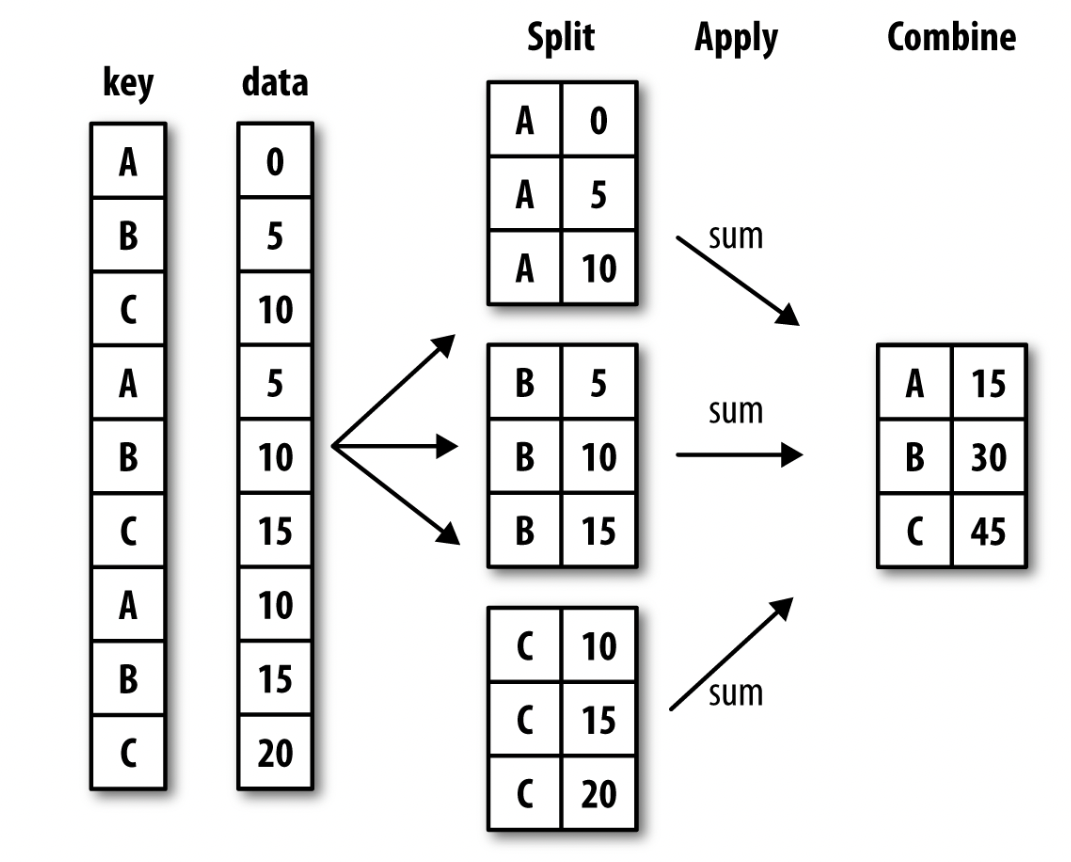

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.096775,-0.782163
1,a,two,-0.486617,-1.131576
2,b,one,0.538019,-1.877360
3,b,two,-0.015299,1.119469
4,a,one,-0.306884,-0.866532


In [ ]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
grouped.mean()

key1
a   -0.630092
b    0.261360
Name: data1, dtype: float64

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.701829
      two    -0.486617
b     one     0.538019
      two    -0.015299
Name: data1, dtype: float64

In [ ]:
means.unstack()

key2,one,two
key1,,
a,-0.701829,-0.486617
b,0.538019,-0.015299


In [ ]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

#Data Aggregation
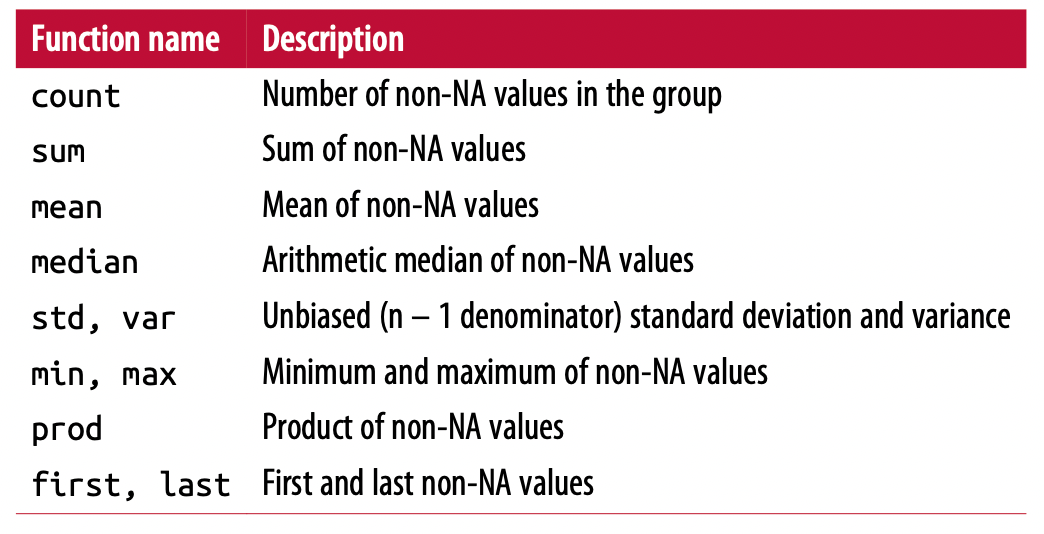

# Iterating Over Groups

In [ ]:
for name, group in df.groupby('key1'):
  print(name)
  print(group)

a
  key1 key2     data1     data2
0    a  one -1.096775 -0.782163
1    a  two -0.486617 -1.131576
4    a  one -0.306884 -0.866532
b
  key1 key2     data1     data2
2    b  one  0.538019 -1.877360
3    b  two -0.015299  1.119469


In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
  print((k1, k2))
  print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -1.096775 -0.782163
4    a  one -0.306884 -0.866532
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.486617 -1.131576
('b', 'one')
  key1 key2     data1    data2
2    b  one  0.538019 -1.87736
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.015299  1.119469


# Column-Wise and Multiple Function Application

In [ ]:
tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [ ]:
tips.groupby(['day', 'smoker'])['tip_pct'].mean()

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [ ]:
tips.groupby(['day', 'smoker'])['tip_pct'].agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [ ]:
tips.groupby(['day', 'smoker'])['tip_pct'].agg(['mean','std'])

mean       std
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [ ]:
def peak_to_peak(arr):
  return arr.max() - arr.min()
tips.groupby(['day', 'smoker'])['tip_pct'].agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

#Apply

In [ ]:
def top(df, n=5, column='tip_pct'):
  return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [ ]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982